# **word n grame**

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


In [23]:
# Load your data into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/seema/2nd_data.csv')

tweets = df['Tweet'].values
labels =  df['sub_labels'].values


Fold 1
Accuracy: 0.6984304932735426
Precision: 0.7449115782449116
Recall: 0.6209138885914259
F1 Score: 0.6437019664802236
Confusion Matrix for fold 1:


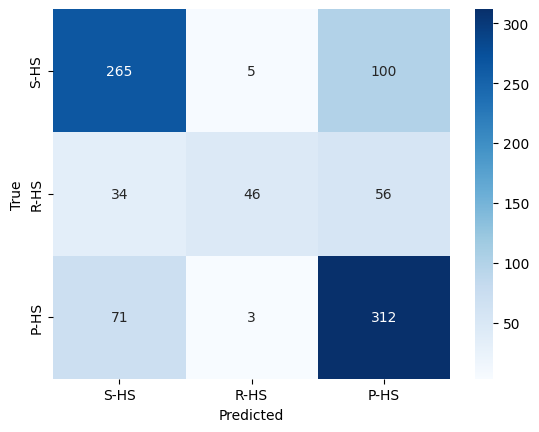


Fold 2
Accuracy: 0.6872197309417041
Precision: 0.7139400300803809
Recall: 0.6196552770386967
F1 Score: 0.6410568156710804
Confusion Matrix for fold 2:


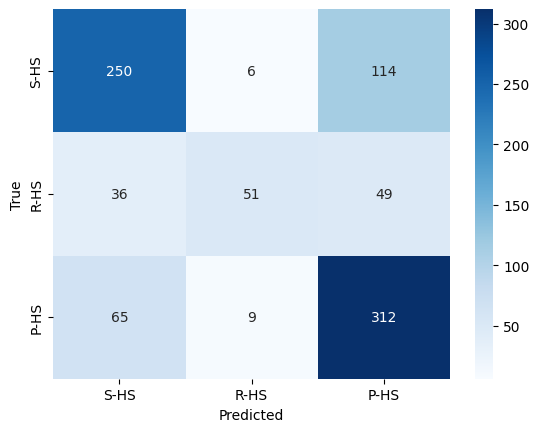


Fold 3
Accuracy: 0.6891133557800224
Precision: 0.7262282571511275
Recall: 0.6086096600802483
F1 Score: 0.6282396632761983
Confusion Matrix for fold 3:


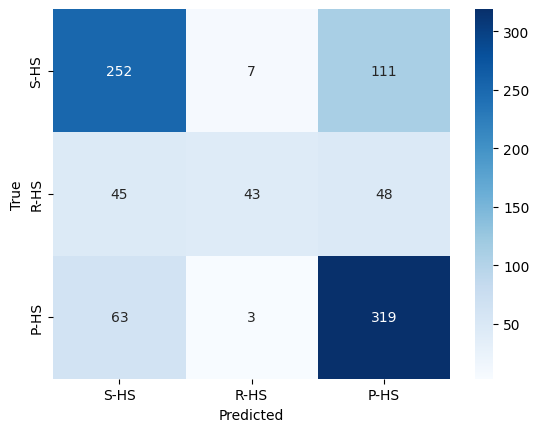


Fold 4
Accuracy: 0.7037037037037037
Precision: 0.7284103843266413
Recall: 0.6357690056378366
F1 Score: 0.6575035558473261
Confusion Matrix for fold 4:


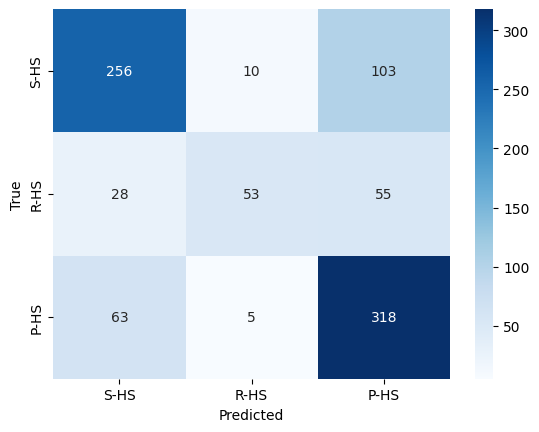


Fold 5
Accuracy: 0.7104377104377104
Precision: 0.7527432712215321
Recall: 0.6427764823721589
F1 Score: 0.6677043511086702
Confusion Matrix for fold 5:


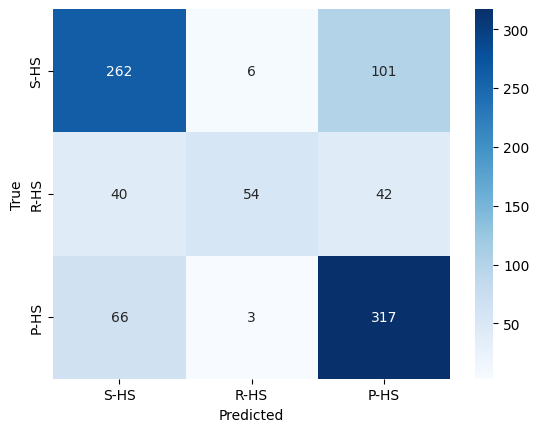


Mean Metrics Across All Folds:
Mean Accuracy: 0.6977809988273366
Mean Precision: 0.7332467042049187
Mean Recall: 0.6255448627440734
Mean F1 Score: 0.6476412704766997


In [24]:
# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
scores = []

# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

    # Initialize and train the RandomForestClassifier model
    rf_model = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200, random_state=42)
    rf_model.fit(X_train_tfidf, y_train)

    # Evaluate the model
    y_pred = rf_model.predict(X_val_tfidf)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))


    # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')


    # Compute and print the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['S-HS','R-HS', 'P-HS'], yticklabels=['S-HS','R-HS', 'P-HS'])
    # sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')


# **char ngrame **


Fold 1
Accuracy: 0.702914798206278
Precision: 0.7259826928405482
Recall: 0.6455647586019424
F1 Score: 0.6678677217035999
Confusion Matrix for fold 1:


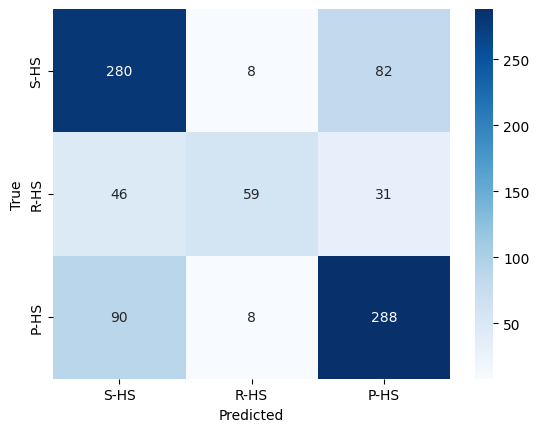


Fold 2
Accuracy: 0.6995515695067265
Precision: 0.7410898240846345
Recall: 0.626875801433863
F1 Score: 0.6503208713887041
Confusion Matrix for fold 2:


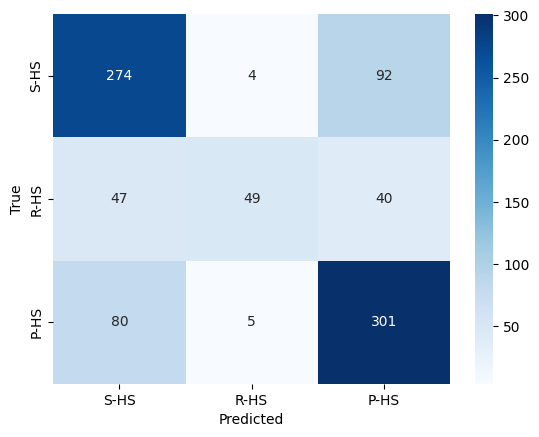


Fold 3
Accuracy: 0.7295173961840629
Precision: 0.7458125371360665
Recall: 0.6553438082849848
F1 Score: 0.6761545995869428
Confusion Matrix for fold 3:


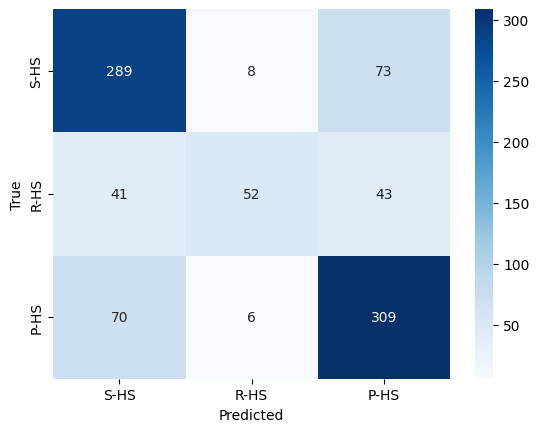


Fold 4
Accuracy: 0.7093153759820426
Precision: 0.7046325231346725
Recall: 0.6426290456646312
F1 Score: 0.6596200500307773
Confusion Matrix for fold 4:


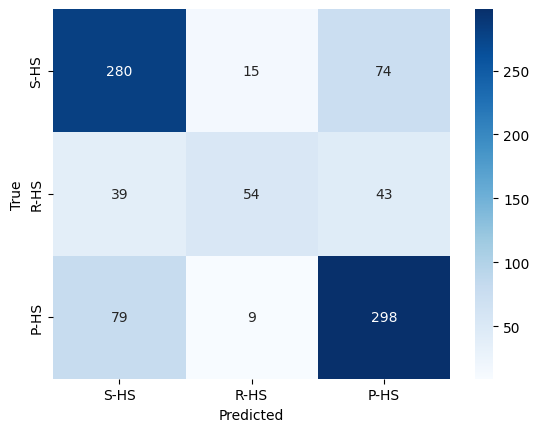


Fold 5
Accuracy: 0.7115600448933782
Precision: 0.7465610948871274
Recall: 0.6489195064408229
F1 Score: 0.6735462784791472
Confusion Matrix for fold 5:


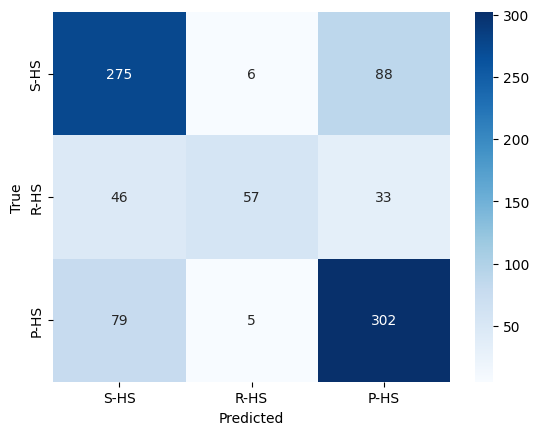


Mean Metrics Across All Folds:
Mean Accuracy: 0.7105718369544977
Mean Precision: 0.7328157344166099
Mean Recall: 0.6438665840852489
Mean F1 Score: 0.6655019042378342


In [25]:
tweets = df['Tweet'].values
labels =  df['sub_labels'].values

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
scores = []
# Vectorize the text data using Character N-grams
tfidf_vectorizer = TfidfVectorizer(analyzer='char', max_features=10000, ngram_range=(2, 6))
X_tfidf = tfidf_vectorizer.fit_transform(tweets)


# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_tfidf, labels)):
    print(f'\nFold {fold + 1}')

    # Split the data
    X_train_tfidf, X_val_tfidf = X_tfidf[train_idx], X_tfidf[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the RandomForestClassifier model
    rf_model = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200, random_state=42)
    rf_model.fit(X_train_tfidf, y_train)


    # Evaluate the model
    y_pred = rf_model.predict(X_val_tfidf)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

        # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')



    # Compute and print the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['S-HS','R-HS', 'P-HS'], yticklabels=['S-HS','R-HS', 'P-HS'])
    # sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')


**word/char n grame**


Fold 1
Accuracy: 0.7107623318385651
Precision: 0.7294355868580736
Recall: 0.6532344291868827
F1 Score: 0.6749208841531921
Confusion Matrix for fold 1:


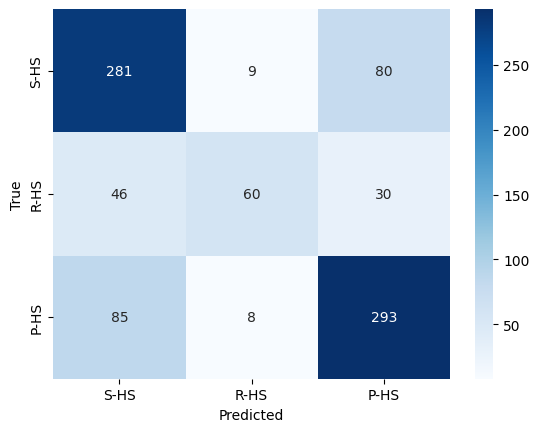


Fold 2
Accuracy: 0.718609865470852
Precision: 0.769104069389667
Recall: 0.6450298744340195
F1 Score: 0.6703804351982031
Confusion Matrix for fold 2:


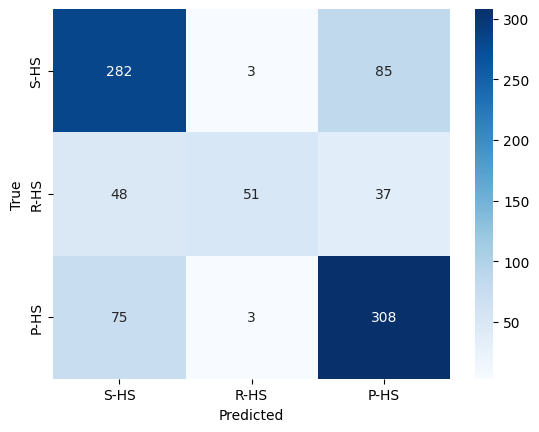


Fold 3
Accuracy: 0.7373737373737373
Precision: 0.7540586870483779
Recall: 0.6724655709949827
F1 Score: 0.6944899942261421
Confusion Matrix for fold 3:


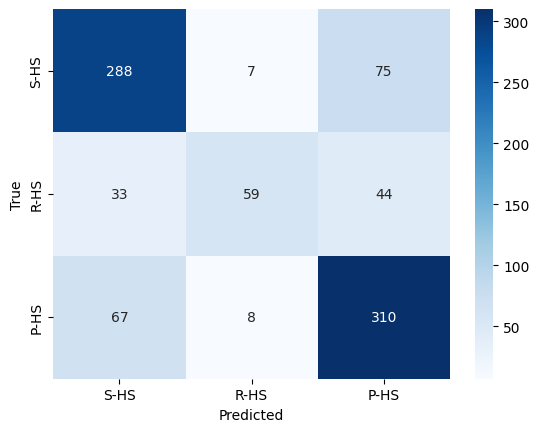


Fold 4
Accuracy: 0.6936026936026936
Precision: 0.6946763551456178
Recall: 0.6289120286051991
F1 Score: 0.6464794081036825
Confusion Matrix for fold 4:


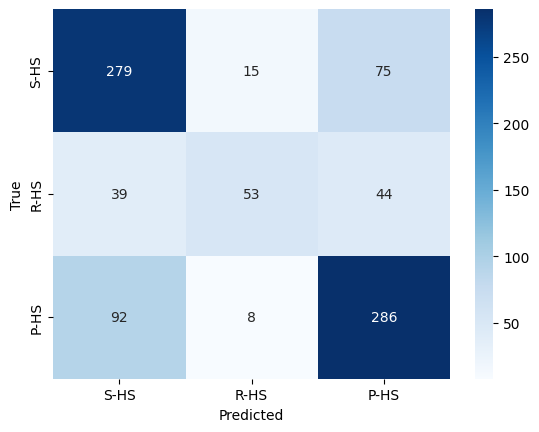


Fold 5
Accuracy: 0.7227833894500562
Precision: 0.7601151352559804
Recall: 0.6640241286848508
F1 Score: 0.6897375690292669
Confusion Matrix for fold 5:


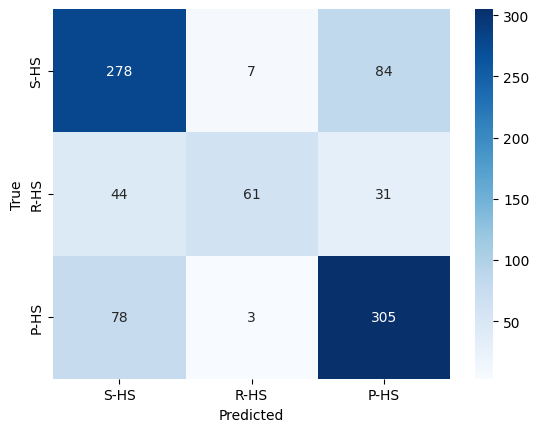


Mean Metrics Across All Folds:
Mean Accuracy: 0.7166264035471809
Mean Precision: 0.7414779667395434
Mean Recall: 0.652733206381187
Mean F1 Score: 0.6752016581420974


In [26]:
from scipy.sparse import hstack


# Initialize TfidfVectorizer for Word N-grams and Character N-grams
word_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
char_vectorizer = TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 6))

# Fit and transform the tweets using both vectorizers
X_word = word_vectorizer.fit_transform(tweets)
X_char = char_vectorizer.fit_transform(tweets)

# Combine the Word and Character N-grams features
X_combined = hstack([X_word, X_char])

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5)

# Initialize lists to store metrics for each fold
scores = []

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(skf.split(X_combined, labels)):
    print(f'\nFold {fold + 1}')

    # Split the combined features for training and validation
    X_train, X_val = X_combined[train_idx], X_combined[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Initialize and train the RandomForestClassifier model
    rf_model = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 200, random_state=42)
    rf_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = rf_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    recall = recall_score(y_val, y_pred, average='macro')
    f1 = f1_score(y_val, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

        # Output metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['S-HS','R-HS', 'P-HS'], yticklabels=['S-HS','R-HS', 'P-HS'])
    # sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')
